In [3]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 


In [5]:
os.getcwd()
os.chdir('../')

In [6]:
os.getcwd()

'e:\\Mlop\\End to end\\RecAPI_MovieFuse'

In [7]:
df = pd.read_csv('artifacts\CSV_data.csv')

In [12]:
df.head(1)

,id,title,original_language,release_date,overview,popularity,vote_average,vote_count,genre_ids
0,574475,Final Destination Bloodlines,en,2025-05-14,"Plagued by a violent recurring nightmare, coll...",1160.8402,7.184,850,"27,9648"


In [17]:
df['genre_ids']=df['genre_ids'].apply(lambda x: list(map(int,str(x).split(','))) if pd.notnull(x) else [])

In [70]:
all_genrs = [gener for sublist in df['genre_ids'] for gener in sublist]
unique_genres= sorted(set(all_genrs))


In [73]:
df.head()

,id,title,original_language,release_date,overview,popularity,vote_average,vote_count,genre_ids,12,...,53,80,99,878,9648,10402,10749,10751,10752,10770
0,574475,Final Destination Bloodlines,en,2025-05-14,"Plagued by a violent recurring nightmare, coll...",1160.8402,7.184,850,"[27, 9648]",0,...,0,0,0,0,1,0,0,0,0,0
1,1087891,The Amateur,en,2025-04-09,After his life is turned upside down when his ...,493.4736,6.907,524,"[53, 28]",0,...,1,0,0,0,0,0,0,0,0,0
2,1426776,STRAW,en,2025-06-05,What will be her last straw? A devastatingly b...,458.5632,8.097,486,"[53, 18, 80]",0,...,1,1,0,0,0,0,0,0,0,0
3,552524,Lilo & Stitch,en,2025-05-17,The wildly funny and touching story of a lonel...,411.1899,7.100,651,"[10751, 878, 35, 12]",1,...,0,0,0,1,0,0,0,1,0,0
4,870028,The Accountant²,en,2025-04-23,"When an old acquaintance is murdered, Wolff is...",310.9376,7.220,821,"[9648, 80, 53]",0,...,1,1,0,0,1,0,0,0,0,0


In [35]:
genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb= MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre_ids']), columns=mlb.classes_)
df=pd.concat([df,genre_encoded],axis=1)


In [ ]:
gener_conut=genre_encoded.sum().sort_values(ascending=False)
# gener_name=[genre_map[i] for i in gener_conut.index]
gener_conut=gener_conut.rename(index=genre_map)


C:\Users\User\AppData\Local\Temp\ipykernel_19496\533642388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Genre', y='Count', palette='mako')


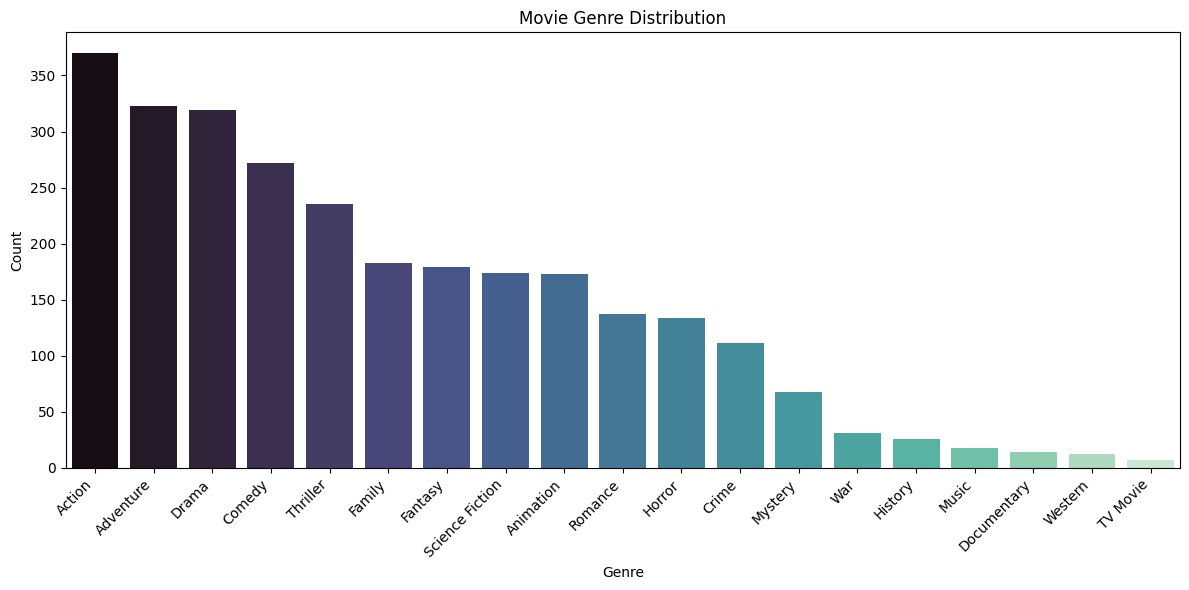

In [65]:
genre_df = gener_conut.reset_index()
genre_df.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x='Genre', y='Count', palette='mako')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Movie Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()

plt.show()

In [68]:
avg_ratings = {}

for genre in genre_encoded.columns:
    avg = df[df[genre] == 1]['vote_average'].mean()
    avg_ratings[genre] = avg

C:\Users\User\AppData\Local\Temp\ipykernel_19496\3041840549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ratings_df, x='Genre', y='Average Rating', palette='crest')


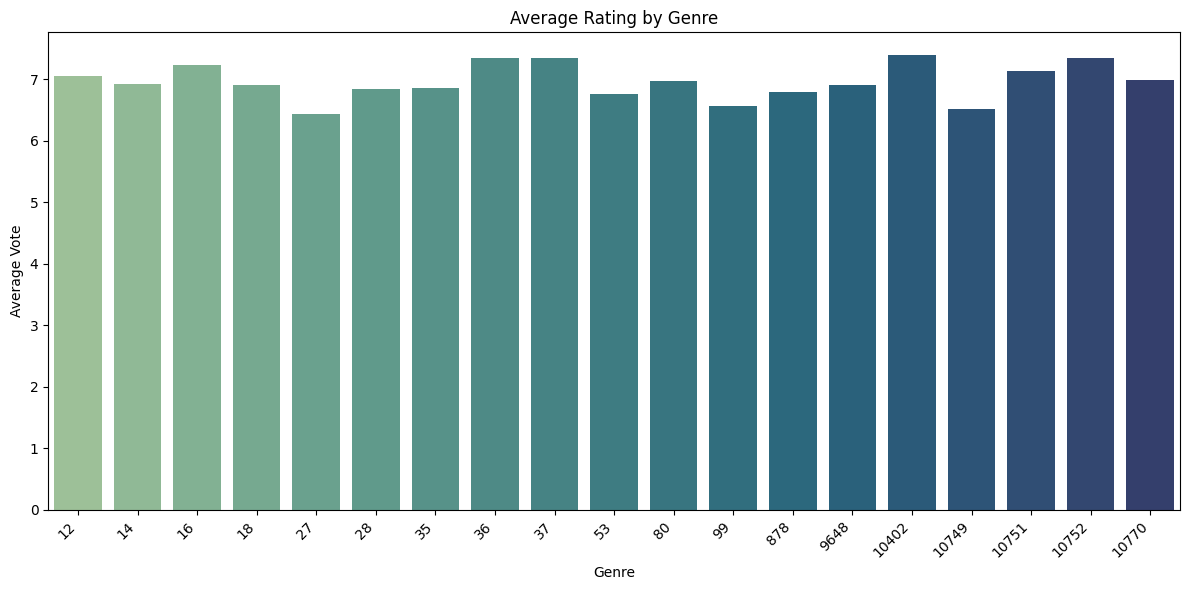

In [69]:
avg_ratings_df = pd.DataFrame(list(avg_ratings.items()), columns=['Genre', 'Average Rating'])
avg_ratings_df = avg_ratings_df.sort_values(by='Average Rating', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_ratings_df, x='Genre', y='Average Rating', palette='crest')

plt.xticks(rotation=45, ha='right')

# تحسينات جمالية
plt.title("Average Rating by Genre")
plt.ylabel("Average Vote")
plt.xlabel("Genre")
plt.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19496\2892551982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='Set2')


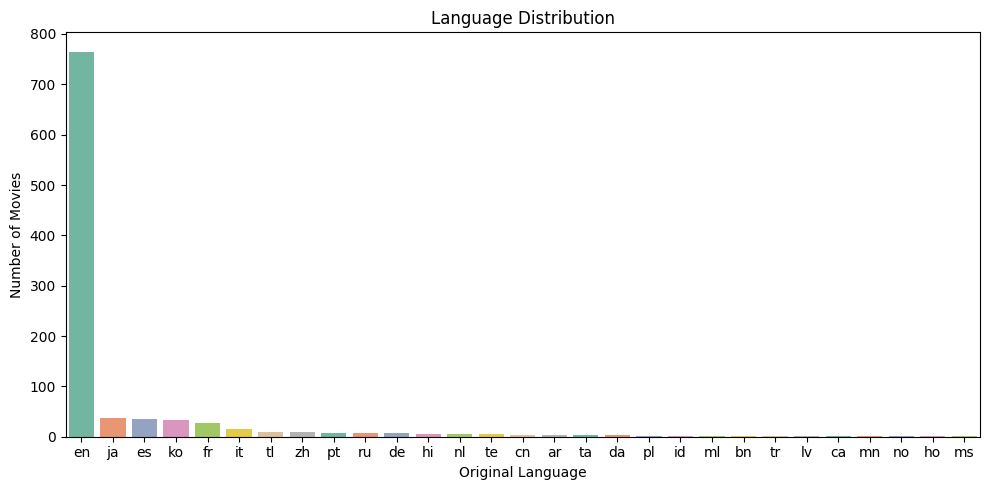

In [74]:
language_counts = df['original_language'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='Set2')
plt.title("Language Distribution")
plt.xlabel("Original Language")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

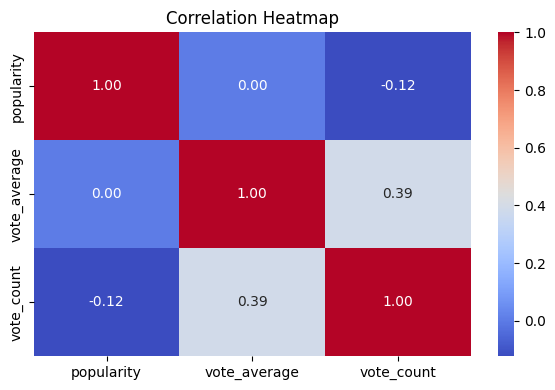

In [75]:
correlation_data = df[['popularity', 'vote_average', 'vote_count']].dropna()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

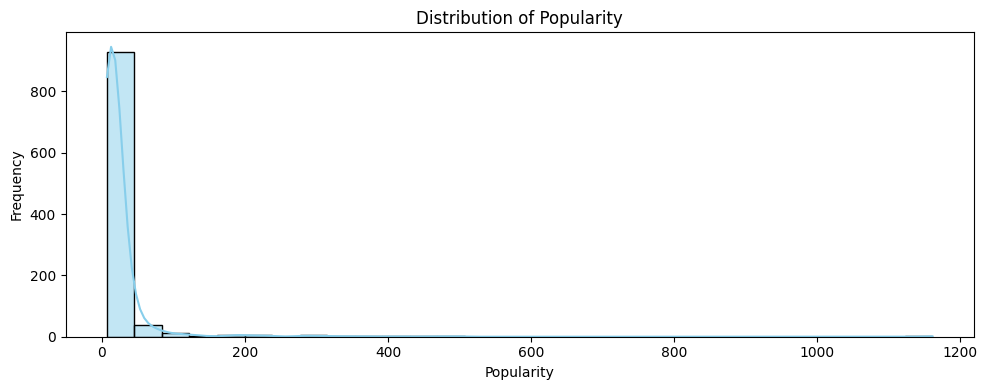

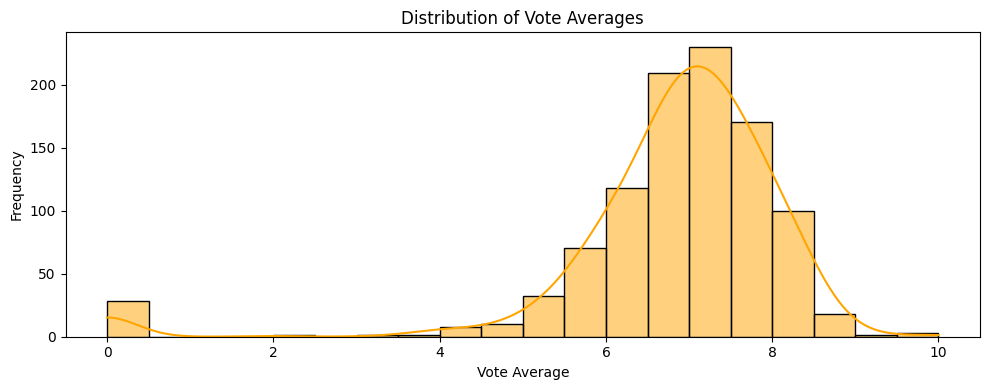

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['popularity'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['vote_average'].dropna(), kde=True, bins=20, color='orange')
plt.title("Distribution of Vote Averages")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

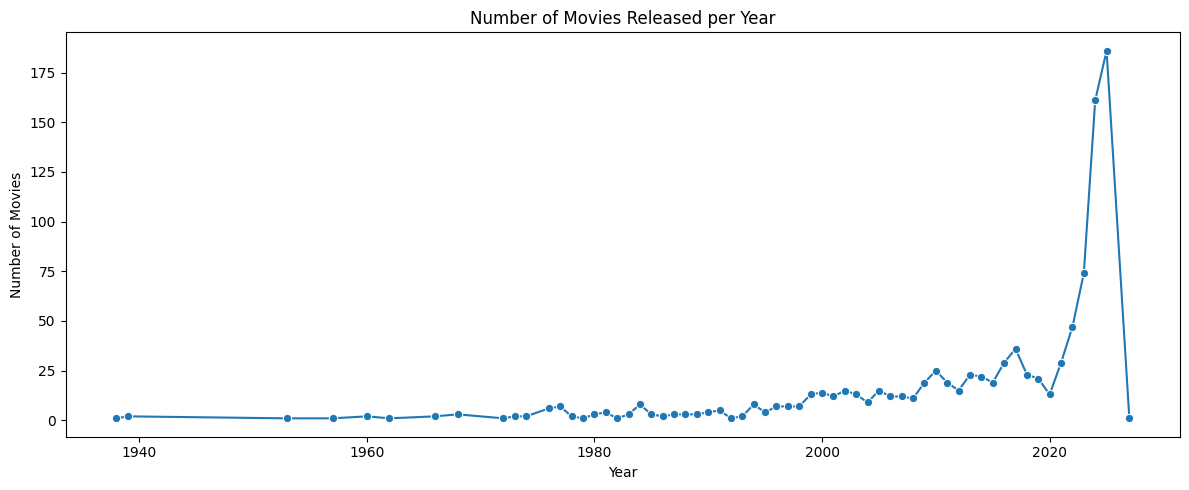

In [78]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# إنشاء عمود السنة والشهر
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.to_period('M').astype(str)

# عدد الأفلام لكل سنة
yearly_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

